
# **Heart Disease Prediction**

**Organization:** CodeAlpha

**Task:** Task 4 – Disease Prediction from Medical Data

**Objective:** Predict the possibility of heart disease in patients using structured medical data by applying Classification techniques using Logistic Regression, SVM, Random Forest, and XGBoost.

---

In [ ]:
import numpy as np  # For numerical operations and array handling
import pandas as pd # For data manipulation and analysis, often used with DataFrames

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler # To scale numerical features

# For model building (import specific models as needed)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


about dataset features: 

* **age**: The patient's age.
* **sex**: The patient's gender. Often represented as 1 for male and 0 for female.
* **cp**: Chest pain type. This is a categorical value describing the kind of chest pain experienced.
* **trestbps**: Resting blood pressure. This is the blood pressure measured when the patient is at rest.
* **chol**: Serum cholesterol. The level of cholesterol in the patient's blood.
* **fbs**: Fasting blood sugar. This indicates if the patient's blood sugar is high after fasting.
* **restecg**: Resting electrocardiographic results. The results of an ECG test performed while the patient is at rest.
* **thalach**: Maximum heart rate achieved. The highest heart rate the patient reached during a stress test.
* **exang**: Exercise-induced angina. This is a yes/no indicator for chest pain that occurs during exercise.
* **oldpeak**: ST depression induced by exercise. This measures how much the ECG's ST segment drops during exercise.
* **slope**: The slope of the peak exercise ST segment. This describes the trend of the ST segment on the ECG.
* **ca**: Number of major vessels colored by fluoroscopy. This counts the number of major blood vessels that show a blockage.
* **thal**: Thalassemia. A type of blood disorder.
* **target**: The final outcome. This is what you are trying to predict: whether the patient has heart disease or not.

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.isnull().sum().any()

False

In [9]:
# Display descriptive statistics for numerical features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Target Variable Analysis

target
1    526
0    499
Name: count, dtype: int64


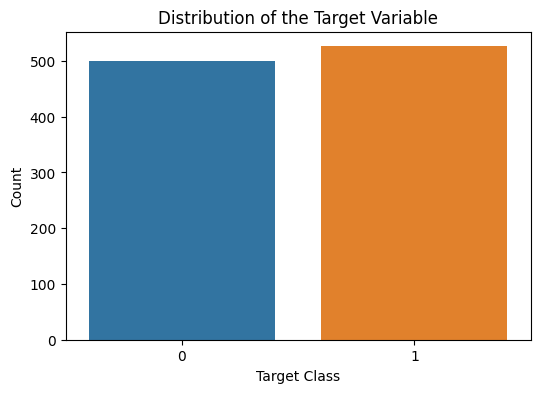

In [10]:
# Count the occurrences of each class in the target variable
print(df['target'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of the Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

#### The dataset has 526 instances of patients with heart disease and 499 instances of patients without heart disease.

In [12]:
import warnings
warnings.filterwarnings('ignore')

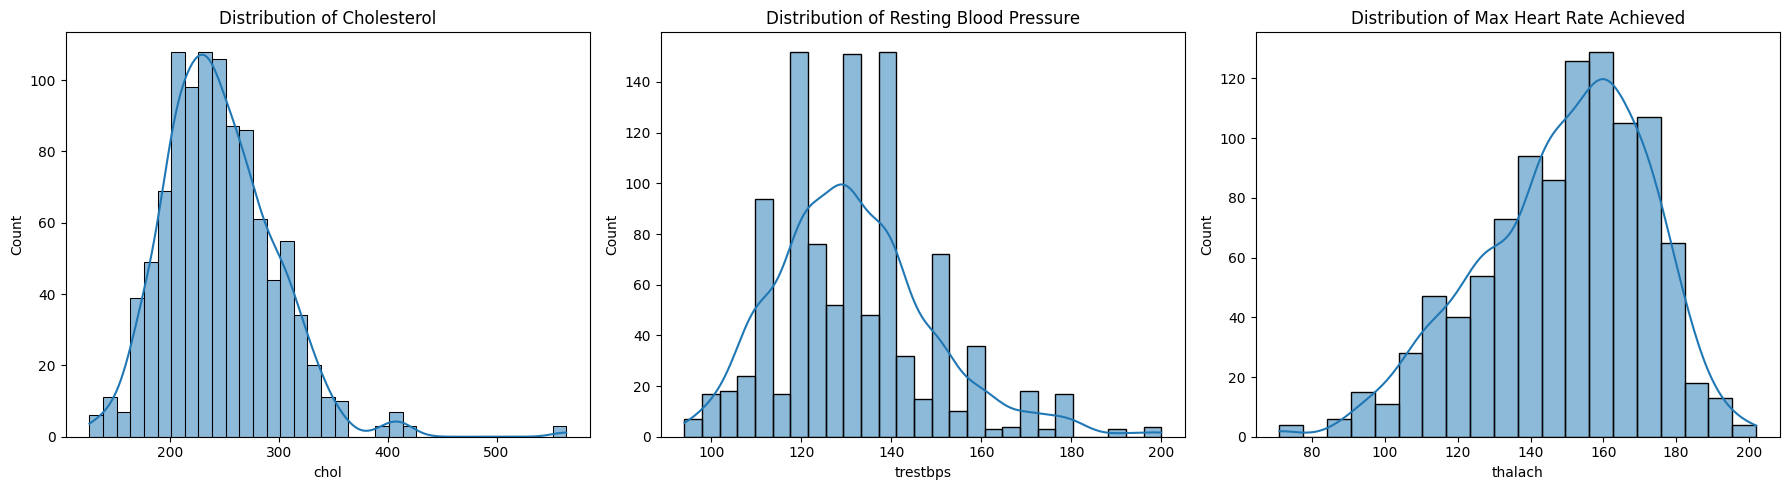

In [13]:
# Feature Distribution
# Let's visualize the distribution of a few key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of 'chol' (cholesterol)
sns.histplot(df['chol'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Cholesterol')

# Distribution of 'trestbps' (resting blood pressure)
sns.histplot(df['trestbps'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Resting Blood Pressure')

# Distribution of 'thalach' (maximum heart rate achieved)
sns.histplot(df['thalach'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Max Heart Rate Achieved')

plt.tight_layout()
plt.show()

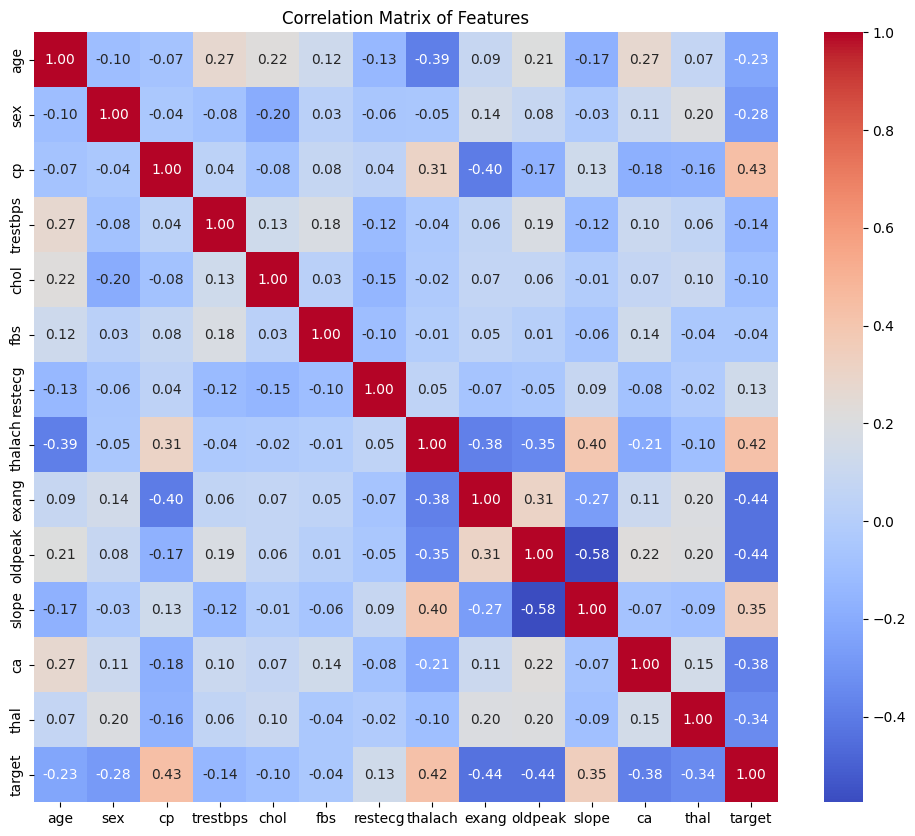

In [14]:
# Correlation Analysis
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Data Preprocessing

In [22]:
# Original: 0 = no disease, 1–4 = disease
df['target'] = (df['target'] > 0).astype(int)

### Separate target and features

In [23]:
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature Scaling

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train Logistic Regression

In [41]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, max_iter=1000, random_state=42)

In [42]:
# 2. Make Predictions

y_pred = log_reg.predict(X_test_scaled)

# Evaluate Model

In [43]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [44]:
print("Logistic Regression Results")
print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

Logistic Regression Results
Accuracy: 0.81
Confusion Matrix:
 [[70 30]
 [ 9 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Store results
results = {}

# -----------------------------
# 1. Logistic Regression (already done)
# -----------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}

# -----------------------------
# 2. Support Vector Machine
# -----------------------------
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}

# -----------------------------
# 3. Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)  # no scaling needed for RF
y_pred = rf.predict(X_test)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}

# -----------------------------
# 4. XGBoost
# -----------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}




In [49]:
# -----------------------------
# 5. Show Comparison Table
# -----------------------------
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-score,ROC-AUC
Logistic Regression,0.809756,0.761905,0.914286,0.831169,0.807143
SVM,0.926829,0.916667,0.942857,0.929577,0.926429
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", scores.mean())


Random Forest CV Accuracy: 0.9970731707317073


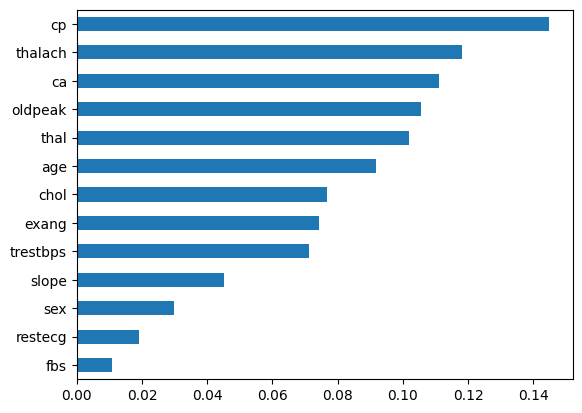

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()


In [52]:
feat_importances.sort_values()

fbs         0.010670
restecg     0.019166
sex         0.029885
slope       0.045234
trestbps    0.071178
exang       0.074189
chol        0.076579
age         0.091826
thal        0.101825
oldpeak     0.105590
ca          0.110965
thalach     0.118097
cp          0.144796
dtype: float64

### Key Takeaways

1. Most predictive features: cp, thalach, ca, oldpeak, thal.

    * These capture direct symptoms, physiological indicators, and severity measures.

2. Moderately predictive features: age, chol, exang, trestbps.

   * These indicate risk factors and general heart health.

3. Least important features: slope, sex, restecg, fbs.

    * They provide weak signal for heart disease in this dataset.